# Assignment 6 Mushroom Model Evaluation Lab

Sarrah Abdulali
#code123

Part 1. Using the mushroom dataset, Define a question that can be answered using classification, specifically kNN.
How well can we build a model that predicts whether a mushroom is poisonous?

Mushroom Documentation

Part 2. Build a kNN model and evaluate the model using using the metrics discussed in class (Accuracy, TPR, FPR, F1, Kappa, LogLoss and ROC/AUC). Make sure to calculate the prevalence to provide a reference for some of these measures. Make sure to properly clean and prepare the data ahead of building the model.

Part 3. In consideration of all the metrics you just used are there a few that seem more important given the question you are asking?

Among the metrics considered, the key parameters for evaluating this binary classification model include accuracy, precision, recall, true positive rate (TPR), and false positive rate (FPR). Accuracy is crucial as it gauges the overall correctness of the model's predictions. TPR is significant in assessing the model's proficiency in predicting the positive class (poisonous nature of mushrooms), while FPR evaluates its effectiveness in predicting the negative class. Precision and recall, intricately connected to TPR and FPR, also play vital roles in the model's performance assessment

Part 4. Consider where miss-classification errors are occurring, is there a pattern? If so discuss this pattern and why you think this is the case.

Inaccuracies persistently arise in the model's predictions of the negative class (specificity). A discernible trend indicates that the model tends to misclassify true negatives as false positives. This pattern could stem from an imbalance between the positive and negative classes or a bias in the data favoring the prediction of negative (edible) cases.

Part 5. Based on your exploration in Part 3/4, change the threshold using the function provided (in the in-class example), what differences do you see in the evaluation metrics? Does it get better at addressing your question or not, why?

Modifying the threshold adversely affects the evaluation metrics by introducing bias in the model toward positive/negative cases, complicating the task of addressing the question. Increasing the threshold introduces a bias toward false negatives, while lowering the threshold leads to a bias toward false positives. The optimal threshold is one close to 0.5, as it offers the most balanced approach and minimizes bias in addressing the classification question.

Part 6. Use a metric we did not discuss in class (reference the sklearn model metrics documentation). Once you have the output, summarize in a sentence or two what the metric is and what it means in the context of your question.

The metric I employed, which was not covered in our class discussions, is the class likelihood ratio. This ratio represents the probability of the positive class relative to the probability of the negative class. In the context of my inquiry, the class likelihood ratio indicates the likelihood that a mushroom is poisonous compared to being edible. Based on the output, we can infer that a mushroom is 111.05 times more likely to be poisonous than edible.

Part 7. Summarize your findings speaking through your question, what does the evaluation outputs mean when answering the question? Also, make recommendations on improvements.

To address my initial question, we have developed a highly accurate model for predicting whether a mushroom is poisonous. The model achieves a remarkable accuracy of 99.3%, demonstrating strong sensitivity (true positive rate) and specificity (false positive rate) at 99.7% and 99.2%, respectively. Both precision (measuring the proportion of truly poisonous mushrooms out of all positive predictions) and recall (proportion of truly poisonous mushrooms that the model identifies) are exceptionally high at 1.0, though their elevated values suggest potential noise in the data. Consequently, the F1 score is also high at 99.4%, given the proximity of precision and recall metrics. The kappa measurement, reflecting agreement between predicted and true labels, is similarly high at 98.7%.

Furthermore, the model exhibits a robust ability to classify poisonous mushrooms, as evidenced by a high AUC value of 0.998. The low log loss value of 0.24 indicates that the model accurately predicts probabilities close to the true probabilities, effectively distinguishing between poisonous and non-poisonous mushrooms. However, there are opportunities for improvement, such as achieving a better balance in the provided data to address class bias. Additionally, the unusually high class_likelihood_ratios suggest the presence of confounding factors in the data, which may benefit from removal or reclassification to enhance the model's performance.

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

mushroom_data = pd.read_csv('C:/Users/Student/Downloads/DS-3001/data/secondary_data_mushrooms.csv', delimiter= ";", encoding="cp1252")
mushroom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

c:\Users\Student\miniconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


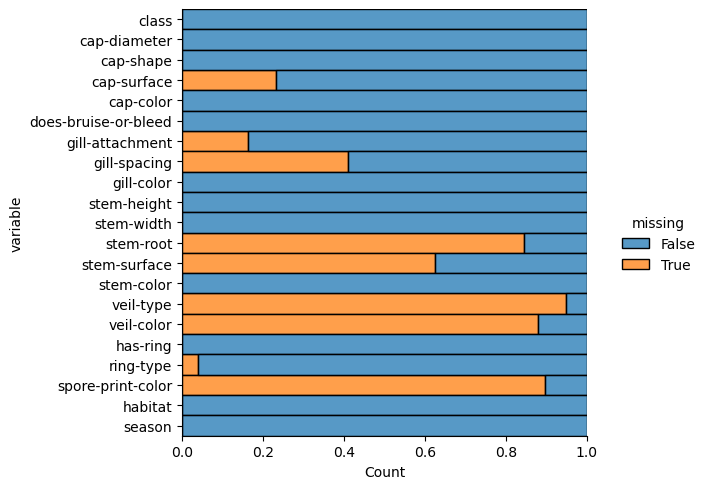

In [6]:
# check for missing data
import seaborn as sns

sns.displot(
    data=mushroom_data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In [7]:
# drop missing columns

mushroom_data = mushroom_data.drop(['spore-print-color', 'veil-type', 'veil-color', 'stem-surface', 'stem-root', 'gill-spacing','season', 'cap-surface'], axis=1)    
mushroom_data.dropna(axis = 0,inplace = True)

c:\Users\Student\miniconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<class 'pandas.core.frame.DataFrame'>
Index: 49067 entries, 0 to 61068
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 49067 non-null  object 
 1   cap-diameter          49067 non-null  float64
 2   cap-shape             49067 non-null  object 
 3   cap-color             49067 non-null  object 
 4   does-bruise-or-bleed  49067 non-null  object 
 5   gill-attachment       49067 non-null  object 
 6   gill-color            49067 non-null  object 
 7   stem-height           49067 non-null  float64
 8   stem-width            49067 non-null  float64
 9   stem-color            49067 non-null  object 
 10  has-ring              49067 non-null  object 
 11  ring-type             49067 non-null  object 
 12  habitat               49067 non-null  object 
dtypes: float64(3), object(10)
memory usage: 5.2+ MB


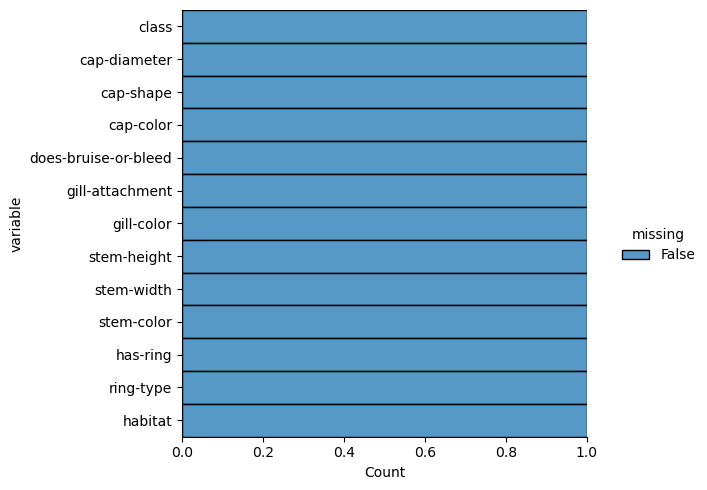

In [8]:
sns.displot(
    data=mushroom_data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
mushroom_data.info()

In [9]:
categorize = mushroom_data.select_dtypes(include=['object']).columns
mushroom_data[categorize] = mushroom_data[categorize].astype('category')
mushroom_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49067 entries, 0 to 61068
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   class                 49067 non-null  category
 1   cap-diameter          49067 non-null  float64 
 2   cap-shape             49067 non-null  category
 3   cap-color             49067 non-null  category
 4   does-bruise-or-bleed  49067 non-null  category
 5   gill-attachment       49067 non-null  category
 6   gill-color            49067 non-null  category
 7   stem-height           49067 non-null  float64 
 8   stem-width            49067 non-null  float64 
 9   stem-color            49067 non-null  category
 10  has-ring              49067 non-null  category
 11  ring-type             49067 non-null  category
 12  habitat               49067 non-null  category
dtypes: category(10), float64(3)
memory usage: 2.0 MB


In [10]:
num_columns = mushroom_data.select_dtypes(include=['float64']).columns
print(num_columns)

Index(['cap-diameter', 'stem-height', 'stem-width'], dtype='object')


In [11]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
d = scaler.fit_transform(mushroom_data[num_columns])
scaled_df = pd.DataFrame(d, columns=num_columns)
mushroom_data[num_columns] = scaled_df[num_columns]

In [12]:
mushroom_data.describe()

,cap-diameter,stem-height,stem-width
count,39183.000000,39183.000000,39183.000000
mean,-0.000413,0.019018,-0.028264
std,1.056153,0.999621,0.972834
min,-1.191416,-1.729042,-1.140192
25%,-0.604834,-0.597054,-0.682280
50%,-0.178560,-0.194423,-0.248069
75%,0.289612,0.333618,0.383813
max,10.084806,7.066139,8.640935


In [13]:
categ_cols = mushroom_data.select_dtypes(include='category').columns
print(categ_cols)

Index(['class', 'cap-shape', 'cap-color', 'does-bruise-or-bleed',
       'gill-attachment', 'gill-color', 'stem-color', 'has-ring', 'ring-type',
       'habitat'],
      dtype='object')


In [14]:
# what can we collapse
print(mushroom_data['cap-shape'].value_counts())
print(mushroom_data['cap-color'].value_counts())
print(mushroom_data['gill-color'].value_counts())
print(mushroom_data['stem-color'].value_counts())
print(mushroom_data['habitat'].value_counts())

cap-shape
x    21839
f    11508
s     6996
b     3096
o     2405
p     1921
c     1302
Name: count, dtype: int64
cap-color
n    18675
y     6385
w     6212
g     3889
e     3357
o     3291
p     1587
u     1542
r     1331
k     1279
l      828
b      691
Name: count, dtype: int64
gill-color
w    14890
y     8029
n     7275
p     5719
f     3530
g     2982
o     2738
r      977
k      881
u      732
e      713
b      601
Name: count, dtype: int64
stem-color
w    17299
n    14565
y     5694
g     2626
o     2187
e     1697
u     1490
p     1025
k      837
f      706
r      542
l      226
b      173
Name: count, dtype: int64
habitat
d    34963
g     5678
l     3168
m     2429
h     2001
p      360
w      353
u      115
Name: count, dtype: int64


In [15]:
#collapse
top_c_shape = ['x', 'f']
mushroom_data['cap-shape'] = (mushroom_data['cap-shape'].apply(lambda x: x if x in top_c_shape else "Other")).astype('category')
top_c_color = ['n']
mushroom_data['cap-color'] = mushroom_data['cap-color'].apply(lambda x: x if x in top_c_color else "Other").astype('category')
top_g_color = ['w','y','n']
mushroom_data['gill-color'] = mushroom_data['gill-color'].apply(lambda x: x if x in top_g_color else "Other").astype('category')
top_s_color = ['w','y','n']
mushroom_data['stem-color'] = mushroom_data['stem-color'].apply(lambda x: x if x in top_s_color else "Other").astype('category')
top_habitat = ['d']
mushroom_data['habitat'] = mushroom_data['habitat'].apply(lambda x: x if x in top_habitat else "Other").astype('category')

In [16]:
encod = pd.get_dummies(mushroom_data[categ_cols])
encod.head()

,class_e,class_p,cap-shape_Other,cap-shape_f,cap-shape_x,cap-color_Other,cap-color_n,does-bruise-or-bleed_f,does-bruise-or-bleed_t,gill-attachment_a,...,has-ring_t,ring-type_e,ring-type_f,ring-type_g,ring-type_l,ring-type_p,ring-type_r,ring-type_z,habitat_Other,habitat_d
0,False,True,False,False,True,True,False,True,False,False,...,True,False,False,True,False,False,False,False,False,True
1,False,True,False,False,True,True,False,True,False,False,...,True,False,False,True,False,False,False,False,False,True
2,False,True,False,False,True,True,False,True,False,False,...,True,False,False,True,False,False,False,False,False,True
3,False,True,False,True,False,True,False,True,False,False,...,True,False,False,False,False,True,False,False,False,True
4,False,True,False,False,True,True,False,True,False,False,...,True,False,False,False,False,True,False,False,False,True


In [17]:
mushroom_data = mushroom_data.drop(categ_cols, axis=1)
mushroom_data = mushroom_data.join(encod)
mushroom_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49067 entries, 0 to 61068
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cap-diameter            39183 non-null  float64
 1   stem-height             39183 non-null  float64
 2   stem-width              39183 non-null  float64
 3   class_e                 49067 non-null  bool   
 4   class_p                 49067 non-null  bool   
 5   cap-shape_Other         49067 non-null  bool   
 6   cap-shape_f             49067 non-null  bool   
 7   cap-shape_x             49067 non-null  bool   
 8   cap-color_Other         49067 non-null  bool   
 9   cap-color_n             49067 non-null  bool   
 10  does-bruise-or-bleed_f  49067 non-null  bool   
 11  does-bruise-or-bleed_t  49067 non-null  bool   
 12  gill-attachment_a       49067 non-null  bool   
 13  gill-attachment_d       49067 non-null  bool   
 14  gill-attachment_e       49067 non-null  boo

c:\Users\Student\miniconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<class 'pandas.core.frame.DataFrame'>
Index: 49067 entries, 0 to 61068
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cap-diameter            39183 non-null  float64
 1   stem-height             39183 non-null  float64
 2   stem-width              39183 non-null  float64
 3   class_e                 49067 non-null  bool   
 4   class_p                 49067 non-null  bool   
 5   cap-shape_Other         49067 non-null  bool   
 6   cap-shape_f             49067 non-null  bool   
 7   cap-shape_x             49067 non-null  bool   
 8   cap-color_Other         49067 non-null  bool   
 9   cap-color_n             49067 non-null  bool   
 10  does-bruise-or-bleed_f  49067 non-null  bool   
 11  does-bruise-or-bleed_t  49067 non-null  bool   
 12  gill-attachment_a       49067 non-null  bool   
 13  gill-attachment_d       49067 non-null  bool   
 14  gill-attachment_e       49067 non-null  boo

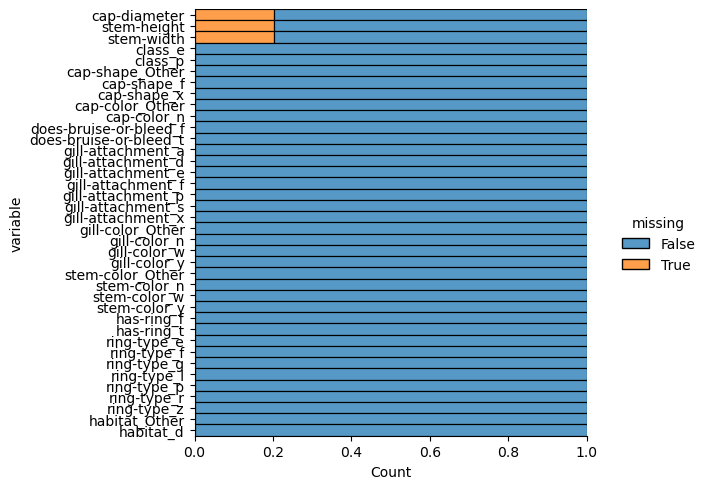

In [18]:
sns.displot(
    data=mushroom_data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
mushroom_data.info()

c:\Users\Student\miniconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<class 'pandas.core.frame.DataFrame'>
Index: 39183 entries, 0 to 49066
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cap-diameter            39183 non-null  float64
 1   stem-height             39183 non-null  float64
 2   stem-width              39183 non-null  float64
 3   class_p                 39183 non-null  bool   
 4   cap-shape_Other         39183 non-null  bool   
 5   cap-shape_f             39183 non-null  bool   
 6   cap-shape_x             39183 non-null  bool   
 7   cap-color_Other         39183 non-null  bool   
 8   cap-color_n             39183 non-null  bool   
 9   does-bruise-or-bleed_f  39183 non-null  bool   
 10  does-bruise-or-bleed_t  39183 non-null  bool   
 11  gill-attachment_a       39183 non-null  bool   
 12  gill-attachment_d       39183 non-null  bool   
 13  gill-attachment_e       39183 non-null  bool   
 14  gill-attachment_f       39183 non-null  boo

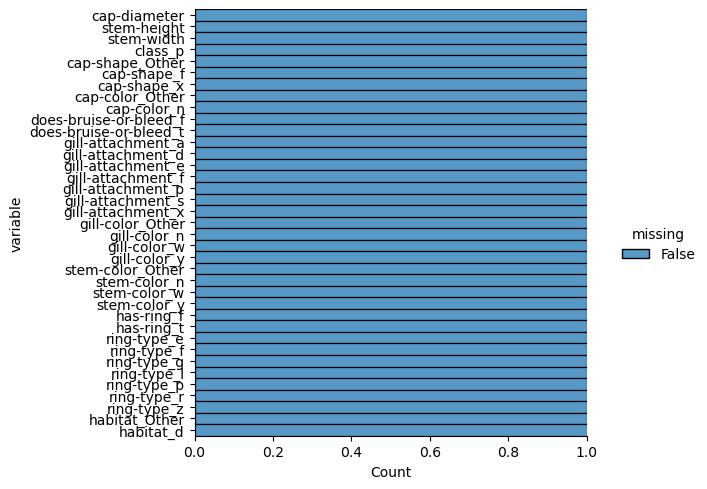

In [19]:
mushroom_data.dropna(axis = 0, how = 'any', inplace = True) 
mushroom_data.drop(['class_e'], axis=1, inplace=True)

sns.displot(
    data=mushroom_data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
mushroom_data.info()

In [20]:
#training the model; here is the prevalence of the target class class_p
mushroom_data['class_p'].value_counts()[1]/mushroom_data['class_p'].count()

0.44144144144144143

In [21]:
train, test = train_test_split(mushroom_data,  test_size=0.4, stratify = mushroom_data['class_p'])

In [22]:
test, val = train_test_split(test,  test_size=0.5, stratify = test['class_p'])

In [23]:
#train the classifier for k = 9
import random 
random.seed(1984)

x_train = train.drop(['class_p'], axis=1).values
y_train = train['class_p'].values

neighb = KNeighborsClassifier(n_neighbors=5)
neighb.fit(x_train, y_train)

KNeighborsClassifier()

In [24]:
#check accuracy of my model
x_test = test.drop(['class_p'], axis=1).values
y_test = test['class_p'].values

neighb.score(x_test, y_test)

0.9933648079622305

In [25]:
#validation data accuracy

x_val = val.drop(['class_p'], axis=1).values
y_val = val['class_p'].values

neighb.score(x_val, y_val)

0.9945132065841521

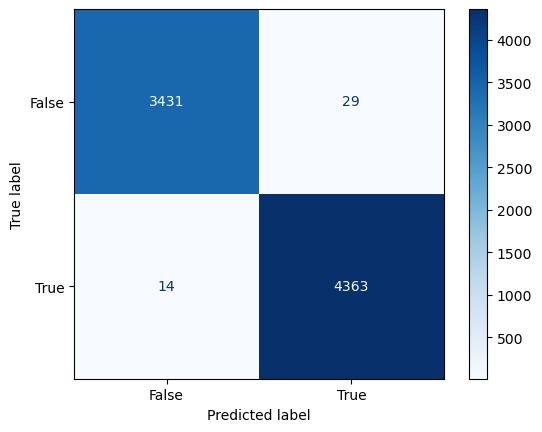

In [26]:
#evaluate my model

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_val, neighb.predict(x_val))
cm_display = ConfusionMatrixDisplay(cm, display_labels=neighb.classes_) 
cm_display.plot(cmap='Blues')
plt.show()

In [27]:
#create classification report
from sklearn.metrics import classification_report

y_val_pred = neighb.predict(x_val)
print(classification_report(y_val_pred, y_val))

              precision    recall  f1-score   support

       False       0.99      1.00      0.99      3445
        True       1.00      0.99      1.00      4392

    accuracy                           0.99      7837
   macro avg       0.99      0.99      0.99      7837
weighted avg       0.99      0.99      0.99      7837



In [29]:
#sensitivity and specificity evaluation

sensitivity = 4363/(4363+14)   # = TP/(TP+FN)
specificity = 3431/(3431+29)   # = TN/(TN+FP)
print(sensitivity, specificity)

0.9968014621887137 0.9916184971098266


In [30]:
#select the correct K
def chooseK(k, x_train, y_train, x_test, y_test):
    random.seed(1)
    print("calculating...", k, "k")
    class_knn = KNeighborsClassifier(n_neighbors=k)
    class_knn.fit(x_train, y_train)

   #calculate accuracy
    accuracy = class_knn.score(x_test, y_test)
    return accuracy 

In [31]:
test = pd.DataFrame({'k' :list(range(1, 22, 2)),
 'accuracy':[chooseK(x, x_train, y_train, x_test, y_test) for x in list(range(1, 22, 2))]})

calculating... 1 k
calculating... 3 k
calculating... 5 k
calculating... 7 k
calculating... 9 k
calculating... 11 k
calculating... 13 k
calculating... 15 k
calculating... 17 k
calculating... 19 k
calculating... 21 k


In [32]:
test

,k,accuracy
0,1,0.992854
1,3,0.993492
2,5,0.993365
3,7,0.993110
4,9,0.992854
5,11,0.992472
6,13,0.992089
7,15,0.991706
8,17,0.991196
9,19,0.990302


k = 3 seems to be the best

In [33]:
test = test.sort_values(by=['accuracy'], ascending=False)
test

,k,accuracy
1,3,0.993492
2,5,0.993365
3,7,0.993110
0,1,0.992854
4,9,0.992854
5,11,0.992472
6,13,0.992089
7,15,0.991706
8,17,0.991196
9,19,0.990302


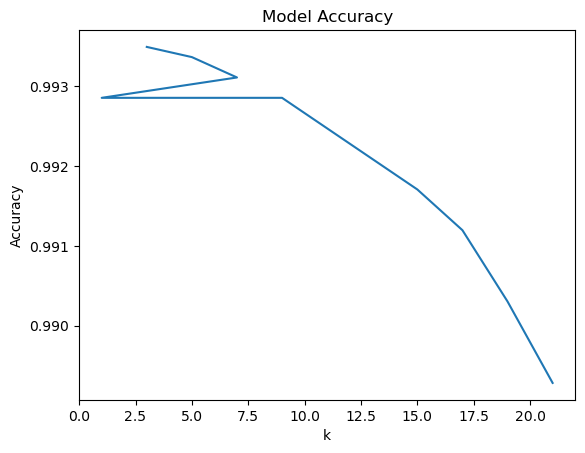

In [35]:
plt.plot(test['k'], test['accuracy'])
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

In [36]:
#adjusting the threshold
test_probs = neighb.predict_proba(x_test)
test_predictions = neighb.predict(x_test)

#convert probabilities to pd dataframe
test_probabilities = pd.DataFrame(test_probs, columns = ['not_class_p_prob', 'class_p_prob'])
test_probabilities

,not_class_p_prob,class_p_prob
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0
...,...,...
7832,1.0,0.0
7833,1.0,0.0
7834,0.0,1.0
7835,1.0,0.0


In [37]:
finalmodel = pd.DataFrame({'actual_class': y_test.tolist(),
 'pred_class': test_predictions.tolist(),
 'pred_prob': [test_probabilities['class_p_prob'][i] if test_predictions[i] == 1 else test_probabilities['not_class_p_prob'][i] for i in range(len(test_predictions))]})

#probability in positive class
finalmodel['pos_pred'] = [finalmodel.pred_prob[i] if finalmodel.pred_class[i] == 1 else 1-finalmodel.pred_prob[i] for i in range(len(finalmodel.pred_class))] 
finalmodel.head()

,actual_class,pred_class,pred_prob,pos_pred
0,False,False,1.0,0.0
1,True,True,1.0,1.0
2,False,False,1.0,0.0
3,True,True,1.0,1.0
4,False,False,1.0,0.0


In [38]:
#convert classes to categories 
finalmodel.actual_class = finalmodel.actual_class.astype('category')
finalmodel.pred_class = finalmodel.pred_class.astype('category')

c:\Users\Student\miniconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


pos_pred
1.0    4325
0.0    3391
0.8      37
0.4      30
0.2      28
0.6      26
Name: count, dtype: int64

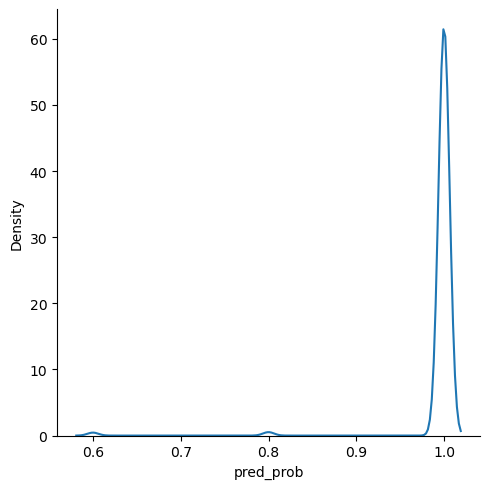

In [39]:
#probability distribution graph 
import seaborn as sns
sns.displot(finalmodel, x="pred_prob", kind="kde")

finalmodel.pos_pred.value_counts()

In [40]:
from sklearn.metrics import confusion_matrix

def adjust_thres(x, y, z):
    """
    x=pred_probabilities
    y=threshold
    z=tune_outcome
    """
    thresh = pd.DataFrame({'new_preds': [1 if i > y else 0 for i in x]})
    thresh.new_preds = thresh.new_preds.astype('category')
    con_mat = confusion_matrix(z, thresh)  
    print(con_mat)

In [47]:
confusion_matrix(finalmodel.actual_class, finalmodel.pred_class)   # original model

array([[3428,   31],
       [  21, 4357]], dtype=int64)

In [51]:
adjust_thres(finalmodel.pos_pred, .90, finalmodel.actual_class)   # raise threshold 
adjust_thres(finalmodel.pos_pred, .3, finalmodel.actual_class)   # lower threshold

[[3451    8]
 [  61 4317]]
[[3408   51]
 [  11 4367]]


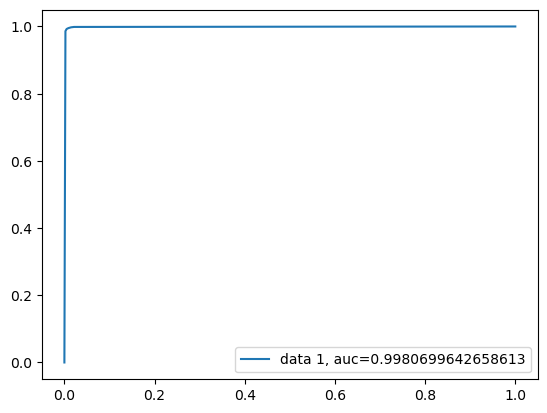

In [42]:
#evaluation metrics
#ROC/AUC

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test, finalmodel.pos_pred)
auc = metrics.roc_auc_score(y_test, finalmodel.pos_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [43]:
! pip install plot_metric

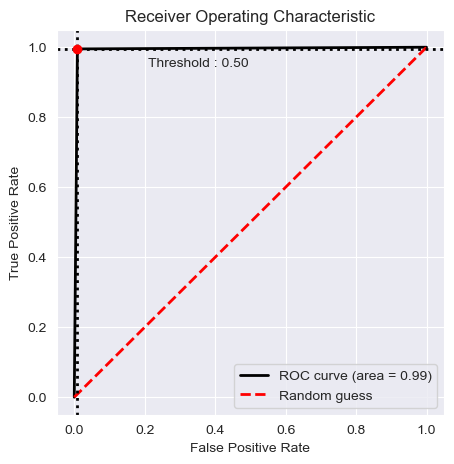

In [44]:
from plot_metric.functions import BinaryClassification

# visualisation with plot_metric
binary_class = BinaryClassification(y_test, finalmodel.pred_class, labels=["0", "1"])

# Figures
plt.figure(figsize=(5,5))
binary_class.plot_roc_curve()
plt.show()

In [49]:
#f1 score calculation
f1 = metrics.f1_score(y_test, finalmodel.pred_class)
print(f1)
#log_loss calculation
logloss = metrics.log_loss(y_test, finalmodel.pred_class)
print(logloss)
#cohen's kappa calculation
from sklearn.metrics import cohen_kappa_score
cohenk = cohen_kappa_score(y_test, finalmodel.pred_class)
print(cohenk)
#class likelihood ratio calculation
from sklearn.metrics import class_likelihood_ratios
CLR = class_likelihood_ratios(y_test, finalmodel.pred_class)
print(CLR)

0.9940679899612138
0.23915656197959595
0.9865405078451173
(111.04542507257696, 0.004840088316836117)
